In [2]:
import sources
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set(style="whitegrid")

Este notebook trabaja con los .pkl que genera el script `sources.py` para cada fuente, que se guardan como `dicc<simbolo, frecuencia>`

In [2]:
# Ploteo de barras
def plot_ordered_bars(dicc):
    """
    Plotea cierta propiedad de una fuente como barras ordenadas.
    La información está guardada como dict<simbolo, numero> 
    """
    # Obtengo los simbolos en orden por los numeros 
    symbols = [x for (x,y) in sorted(dicc.items(),key=lambda x: x[1])]
    symbols = list(map(lambda x: x.replace('\n', '-'),symbols))
    vals = [y for (x,y) in sorted(dicc.items(),key=lambda x: x[1])]
    
    # debug stuff
    print(list(map(lambda x: x.replace('\n', '-'),symbols)))
    print(vals)

    # Los muestro en barras
    fig = plt.figure()
    plt.bar(range(len(symbols)), vals, align='center')
    plt.xticks(range(len(dicc)), symbols)
    fig.autofmt_xdate() # rotar símbolos del eje x

In [25]:
def setKeySeparator(dicc):
    res = dict()
    for k,v in dicc.items():
        redefinedKey = k.replace('\n','-')
        res[redefinedKey] = v
    return res

# Fuente S1

In [3]:
# Ejemplo

pickle_path = '../data/palbi_capture_S1.pkl'
S1 = sources.load_source(pickle_path)

infos = sources.informacion_por_simbolo(S1)
probas = sources.proba_por_simbolo(S1)
entropy = sources.entropy(S1)

In [4]:
# create and normalize dict
dataDict = dict()
for k, v in S1.items():
    (dest,layer2) = k.split('\n')
    if layer2 not in dataDict.keys():
        dataDict[layer2] = dict()
    dataDict[layer2][dest] = v
# print(S1)
# print(dataDict)
packetsFrame = pd.DataFrame(dataDict)
print(packetsFrame["ARP"])

broadcast    2579
unicast       597
Name: ARP, dtype: int64


In [5]:
# create and normalize dict
dataDict = dict()
for k, v in S1.items():
    (dest,layer2) = k.split('\n')
    if layer2 not in dataDict.keys():
        dataDict[layer2] = dict()
    dataDict[layer2][dest] = v
# print(S1)
# print(dataDict)
print(dataDict)

{'IPv6': {'unicast': 438}, 'ARP': {'unicast': 597, 'broadcast': 2579}, 'IP': {'unicast': 25964, 'broadcast': 111}}


['unicast-IP', 'broadcast-ARP', 'unicast-ARP', 'unicast-IPv6', 'broadcast-IP']
[0.19341583926622005, 3.525044822314935, 5.636053758839344, 6.082853820502976, 8.063225013754042]


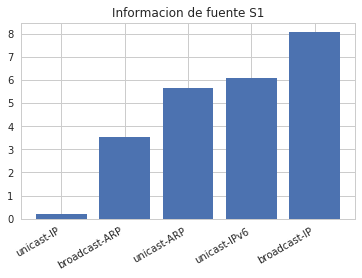

In [6]:
plot_ordered_bars(infos)
plt.title('Informacion de fuente S1')
plt.show()

In [14]:
print(dataDict)

{'IPv6': {'unicast': 438}, 'ARP': {'unicast': 597, 'broadcast': 2579}, 'IP': {'unicast': 25964, 'broadcast': 111}}


In [16]:
valueIfKey = lambda k,v: v[k] if k in v.keys() else 0
total = lambda v: valueIfKey("broadcast",v) + valueIfKey("unicast",v)
broadcast = [valueIfKey("broadcast",v) / total(v) for k,v in dataDict.items()]
unicast = [valueIfKey("unicast",v) / total(v) for k,v in dataDict.items()]
labels = list(dataDict.keys())

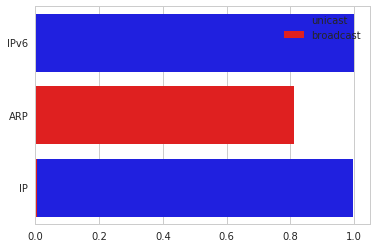

In [18]:
sns.barplot(x=unicast, y=labels, label="unicast", color="b")
sns.barplot(x=broadcast, y=labels, label="broadcast", color="r")
plt.legend()

# Fuente S2

In [28]:
# EjemploZ

pickle_path = '../data/palbi_capture_S2.pkl'
S2 = sources.load_source(pickle_path)

infos = sources.informacion_por_simbolo(S2)
probas = sources.proba_por_simbolo(S2)
entropy = sources.entropy(S2)
S2 = setKeySeparator(S2)

In [29]:
print(S2)

{'who-has-src: 192.168.0.100': 284, 'who-has-src: 192.168.0.110': 10, 'who-has-src: 192.168.0.117': 22, 'who-has-src: 192.168.0.109': 91, 'who-has-src: 192.168.0.1': 1210, 'who-has-src: 192.168.0.112': 299, 'who-has-src: 0.0.0.0': 7, 'who-has-src: 192.168.0.104': 1, 'who-has-src: 192.168.0.102': 943, 'who-has-src: 192.168.0.103': 9, 'who-has-src: 192.168.0.111': 5, 'who-has-src: 192.168.0.106': 295}


['who-has-src: 192.168.0.1', 'who-has-src: 192.168.0.102', 'who-has-src: 192.168.0.112', 'who-has-src: 192.168.0.106', 'who-has-src: 192.168.0.100', 'who-has-src: 192.168.0.109', 'who-has-src: 192.168.0.117', 'who-has-src: 192.168.0.110', 'who-has-src: 192.168.0.103', 'who-has-src: 0.0.0.0', 'who-has-src: 192.168.0.111', 'who-has-src: 192.168.0.104']
[1.392203864981001, 1.7518812364678613, 3.408993522944853, 3.4284240528937544, 3.483248077638276, 5.125200556944262, 7.173563578505662, 8.311067102255596, 8.463070195700645, 8.825640275085354, 9.311067102255596, 11.632995197142959]


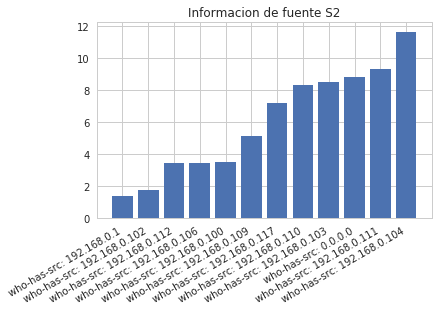

['who-has-src: 192.168.0.104', 'who-has-src: 192.168.0.111', 'who-has-src: 0.0.0.0', 'who-has-src: 192.168.0.103', 'who-has-src: 192.168.0.110', 'who-has-src: 192.168.0.117', 'who-has-src: 192.168.0.109', 'who-has-src: 192.168.0.100', 'who-has-src: 192.168.0.106', 'who-has-src: 192.168.0.112', 'who-has-src: 192.168.0.102', 'who-has-src: 192.168.0.1']
[0.00031486146095717883, 0.0015743073047858943, 0.002204030226700252, 0.0028337531486146094, 0.0031486146095717885, 0.0069269521410579345, 0.028652392947103273, 0.08942065491183879, 0.09288413098236775, 0.09414357682619648, 0.29691435768261965, 0.3809823677581864]


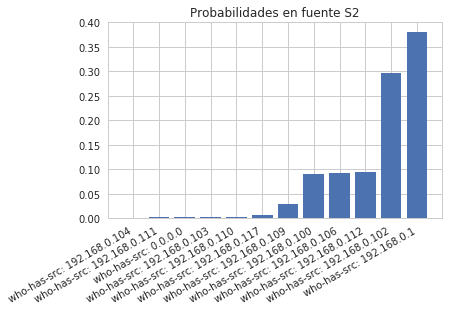

In [20]:
plot_ordered_bars(infos)
plt.title('Informacion de fuente S2')
plt.show()

plot_ordered_bars(probas)
plt.title('Probabilidades en fuente S2')
plt.show()

Text(0.5,15,'ip_dst')

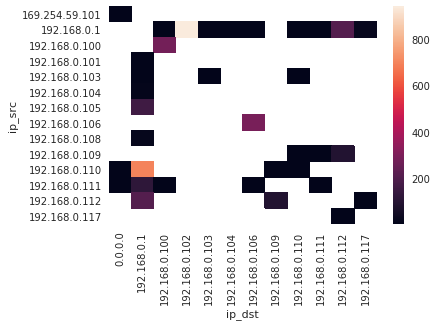

In [12]:
pickle_path = '../data/palbi_capture_hmap.pkl'
hmapDict = sources.load_source(pickle_path)
hmapDF = pd.DataFrame(hmapDict)
# print(hmapDF)
sns.heatmap(hmapDF)
plt.ylabel("ip_src")
plt.xlabel("ip_dst")